In [1]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggridges’ was built under R version 3.4.4”Warning message:
“package ‘ggthemes’ was built under R version 3.4.4”
Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths



In [2]:
agg_data_path = '/Users/Krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
setwd(agg_data_path)

In [3]:
# linux_data_path <- '/home/krista/Documents/gitRepositories/volatileValues/simple_rt_experiment_probabilityC/data/'
# setwd(linux_data_path)

In [4]:
# (files <- dir(path = linux_data_path, pattern = "^[0-9](.*)(_trialset[0-9].csv)$"))

In [5]:
# raw_df <- files %>%
#   map(read_csv,col_types = cols()) %>%                  
#   reduce(rbind) 

In [6]:
# (ID = map(files, substr, start=1, stop=4))
# raw_df$ID = as.numeric(ID)

In [7]:
# condition = map(files, substr, start=10, stop=10)
# raw_df$condition <- as.numeric(condition)
# raw_df$condition <- recode(raw_df$condition, '0' = 'lc', '1' = 'hc', '2'='hv','3'='lv')
# head(raw_df)

In [8]:
clean_df <- read_csv('cleaned_probC_data_test.csv',col_types = cols())
raw_df <- read_csv('raw_probC_data_test.csv',col_types = cols())

clean_df$trial <- rep(seq(1,600),11*4)
max(clean_df$trial)
head(clean_df); head(raw_df)

Warning message:
“Missing column names filled in: 'X1' [1]”Warning message:
“Missing column names filled in: 'X1' [1]”

[1] 600

X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition,trial
0,1,1,1,1,600,0.5257449,2.060731,0.5456106,0,0,112,770,hc,1
1,0,0,1,0,599,0.2968972,1.812463,0.5248838,0,1,111,770,hc,2
2,1,0,0,0,598,0.2102492,1.496023,0.3045535,0,0,111,770,hc,3
3,1,1,1,3,600,0.2763972,1.937237,0.6750797,0,1,112,770,hc,4
4,0,1,0,3,602,0.2870722,1.813193,0.5382493,0,0,112,770,hc,5
5,1,1,1,2,603,0.2484522,1.718456,0.4735218,0,0,112,770,hc,6


X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition
0,1,1,1,1,600,0.5257449,2.060731,0.5456106,0,0,112,770,hc
1,0,0,1,0,599,0.2968972,1.812463,0.5248838,0,1,111,770,hc
2,1,0,0,0,598,0.2102492,1.496023,0.3045535,0,0,111,770,hc
3,1,1,1,3,600,0.2763972,1.937237,0.6750797,0,1,112,770,hc
4,0,1,0,3,602,0.2870722,1.813193,0.5382493,0,0,112,770,hc
5,1,1,1,2,603,0.2484522,1.718456,0.4735218,0,0,112,770,hc


In [9]:
table(clean_df$ID)
table(clean_df$condition)


 761  762  763  764  765  766  767  768  769  770  771 
2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 


  hc   hv   lc   lv 
6600 6600 6600 6600 

In [10]:
(n_subjects = length(unique(raw_df$ID)))
(n_conditions = length(unique(raw_df$condition)))
n_clean_trials = 600
(expected_rows = n_subjects*n_conditions*n_clean_trials)

[1] 11

[1] 4

[1] 26400

In [11]:
fast_slow_trial_freq <- raw_df %>% 
    group_by(ID, condition) %>%  summarize(n_fast_trials = sum(cp_with_slow_fast == -2), 
n_slow_trials = sum(cp_with_slow_fast == -1))

(unique_conds_per_s <- raw_df %>% 
    group_by(ID) %>% summarise(unique_conds_per_s=n_distinct(condition)) )

ID,unique_conds_per_s
761,4
762,4
763,4
764,4
765,4
766,4
767,4
768,4
769,4
770,4


In [12]:
dim(clean_df)

[1] 26400    15

In [13]:
(group_acc <- clean_df %>% 
group_by(condition) %>%  summarize(mean_acc = mean(accuracy))
)
(group_rt <- clean_df %>% 
group_by(condition) %>% summarize(mu_rt=mean(rt)))

condition,mean_acc
hc,0.5269697
hv,0.5566667
lc,0.6587879
lv,0.5816667


condition,mu_rt
hc,0.3350656
hv,0.3471019
lc,0.3237616
lv,0.3254041


In [116]:
(sub_acc <- clean_df %>% 
group_by(condition,ID) %>%  summarize(mean_acc = mean(accuracy))
)
(sub_rt <- clean_df %>% 
group_by(condition,ID) %>% summarize(mean_rt=mean(rt)))

condition,ID,mean_acc
hc,761,0.5466667
hc,762,0.5350000
hc,763,0.5316667
hc,764,0.5116667
hc,765,0.5566667
hc,766,0.5616667
hc,767,0.5200000
hc,768,0.4750000
hc,769,0.5383333
hc,770,0.5100000


condition,ID,mean_rt
hc,761,0.3393513
hc,762,0.3880563
hc,763,0.3273411
hc,764,0.2909015
hc,765,0.3580569
hc,766,0.2963694
hc,767,0.3729386
hc,768,0.3568124
hc,769,0.3112072
hc,770,0.3052426


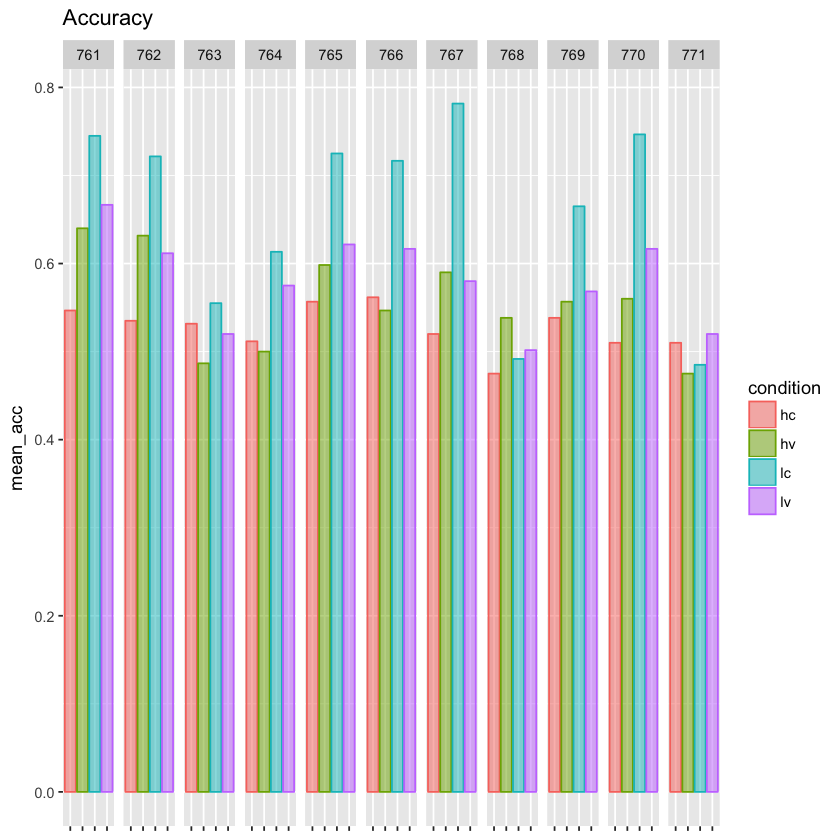

In [122]:
ggplot(sub_acc, aes(x = condition, y=mean_acc, color=condition, fill=condition)) +
    geom_bar(stat='identity', alpha=0.5) + facet_grid(.~ID) +ggtitle('Accuracy') + theme(        axis.text.x=element_blank(), axis.title.x=element_blank())

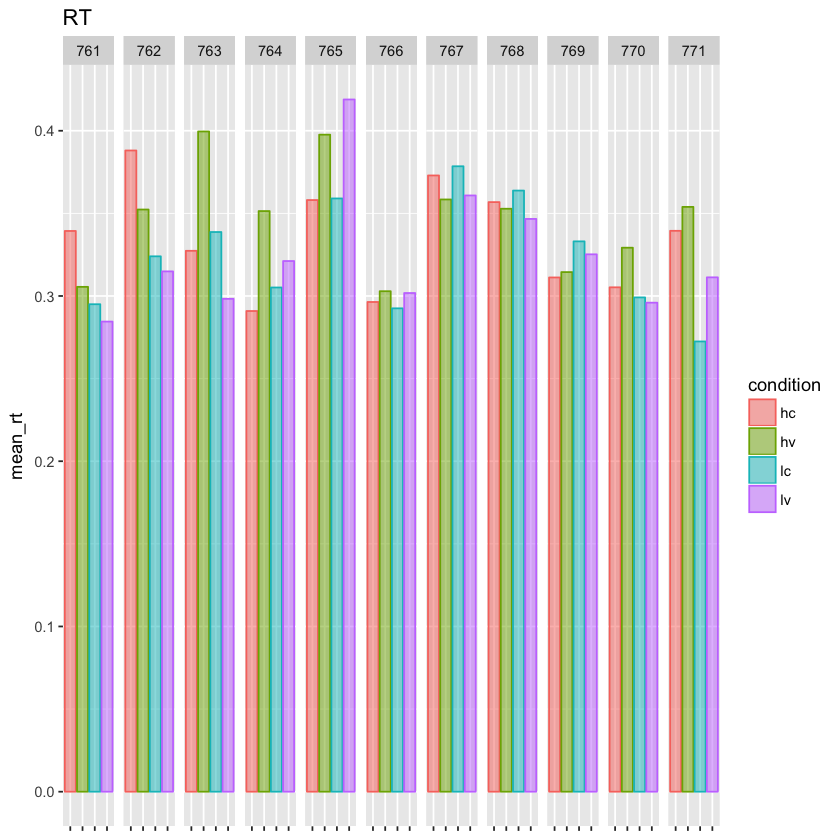

In [121]:
ggplot(sub_rt, aes(x = condition, y=mean_rt, color=condition, fill=condition)) +
    geom_bar(stat='identity', alpha=0.5) + facet_grid(.~ID) +ggtitle('RT')  + theme(        axis.text.x=element_blank(), axis.title.x=element_blank())

In [15]:
(total_n_trials <- n_clean_trials + fast_slow_trial_freq$n_fast_trials + fast_slow_trial_freq$n_slow_trials
)
round(fast_slow_trial_freq$n_fast_trials/total_n_trials,4)
round(fast_slow_trial_freq$n_slow_trials/total_n_trials,4)

[1] 601 600 600 601 608 604 603 601 604 623 609 612 614 614 604 608 603 601 605
[20] 606 606 609 604 604 608 602 600 605 653 627 721 635 601 608 604 608 602 601
[39] 601 600 602 603 607 600

[1] 0.0000 0.0000 0.0000 0.0017 0.0000 0.0033 0.0017 0.0000 0.0066 0.0177
[11] 0.0115 0.0180 0.0147 0.0179 0.0066 0.0066 0.0033 0.0000 0.0066 0.0033
[21] 0.0066 0.0131 0.0050 0.0066 0.0082 0.0000 0.0000 0.0017 0.0429 0.0191
[31] 0.0624 0.0409 0.0017 0.0099 0.0066 0.0099 0.0033 0.0000 0.0017 0.0000
[41] 0.0017 0.0000 0.0099 0.0000

[1] 0.0017 0.0000 0.0000 0.0000 0.0132 0.0033 0.0033 0.0017 0.0000 0.0193
[11] 0.0033 0.0016 0.0081 0.0049 0.0000 0.0066 0.0017 0.0017 0.0017 0.0066
[21] 0.0033 0.0016 0.0017 0.0000 0.0049 0.0033 0.0000 0.0066 0.0383 0.0239
[31] 0.1054 0.0142 0.0000 0.0033 0.0000 0.0033 0.0000 0.0017 0.0000 0.0000
[41] 0.0017 0.0050 0.0016 0.0000

In [16]:
head(raw_df)
(n_subjects = length(unique(raw_df$ID))
)
(n_conditions = length(unique(raw_df$condition))
)# clean_df <- subset(raw_df, cp_with_slow_fast == 0 | cp_with_slow_fast == 1)
# # clean_df$trial <- rep(seq(1,600),n_subjects*n_conditions)
# # dim(clean_df)


X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition
0,1,1,1,1,600,0.5257449,2.060731,0.5456106,0,0,112,770,hc
1,0,0,1,0,599,0.2968972,1.812463,0.5248838,0,1,111,770,hc
2,1,0,0,0,598,0.2102492,1.496023,0.3045535,0,0,111,770,hc
3,1,1,1,3,600,0.2763972,1.937237,0.6750797,0,1,112,770,hc
4,0,1,0,3,602,0.2870722,1.813193,0.5382493,0,0,112,770,hc
5,1,1,1,2,603,0.2484522,1.718456,0.4735218,0,0,112,770,hc


[1] 11

[1] 4

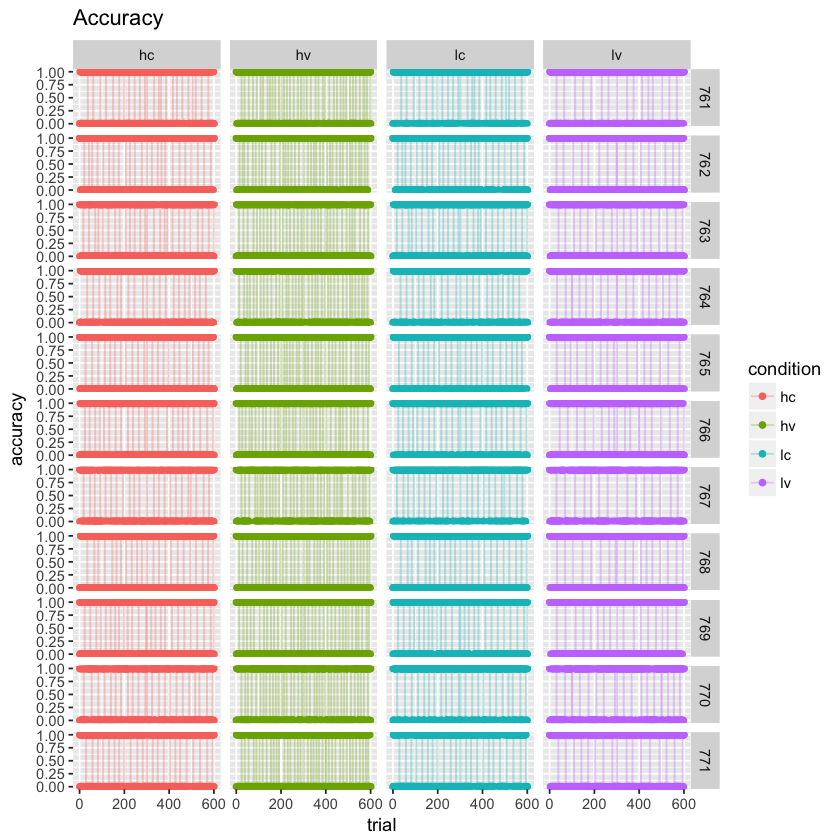

In [17]:
ggplot(clean_df, aes(trial, accuracy, color=condition)) +
    geom_point() +  geom_line(data=clean_df, aes(trial, cp_with_slow_fast), alpha=0.3) + facet_grid( ID ~ condition) + ggtitle('Accuracy') 

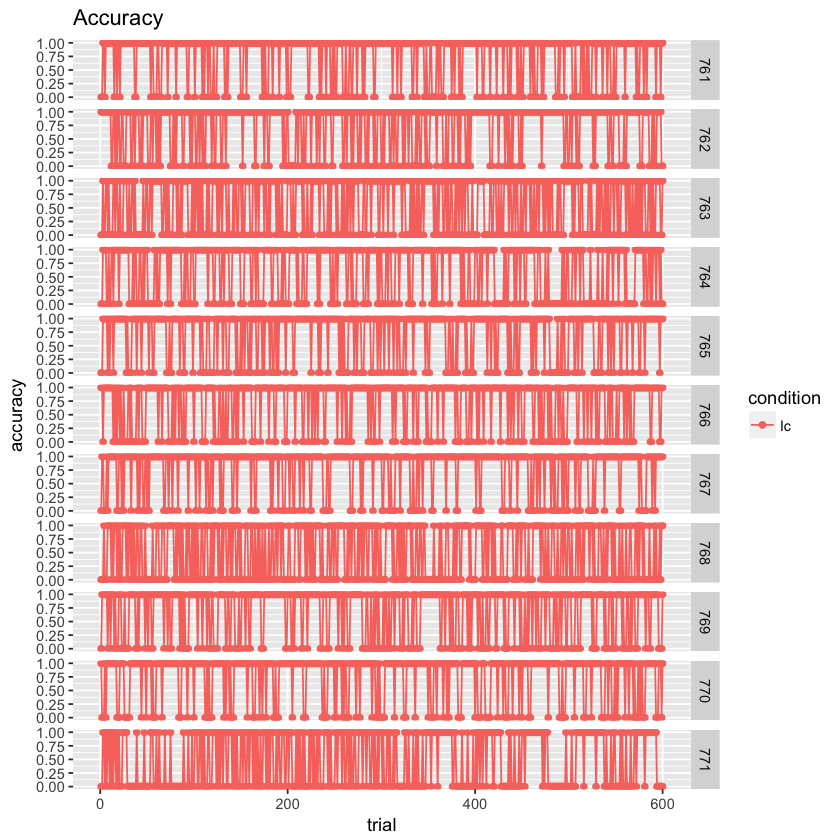

In [18]:
ggplot(subset(clean_df, condition=='lc'), aes(trial, accuracy, color=condition)) +
    geom_point() + geom_line() + facet_grid( ID~.) + ggtitle('Accuracy')

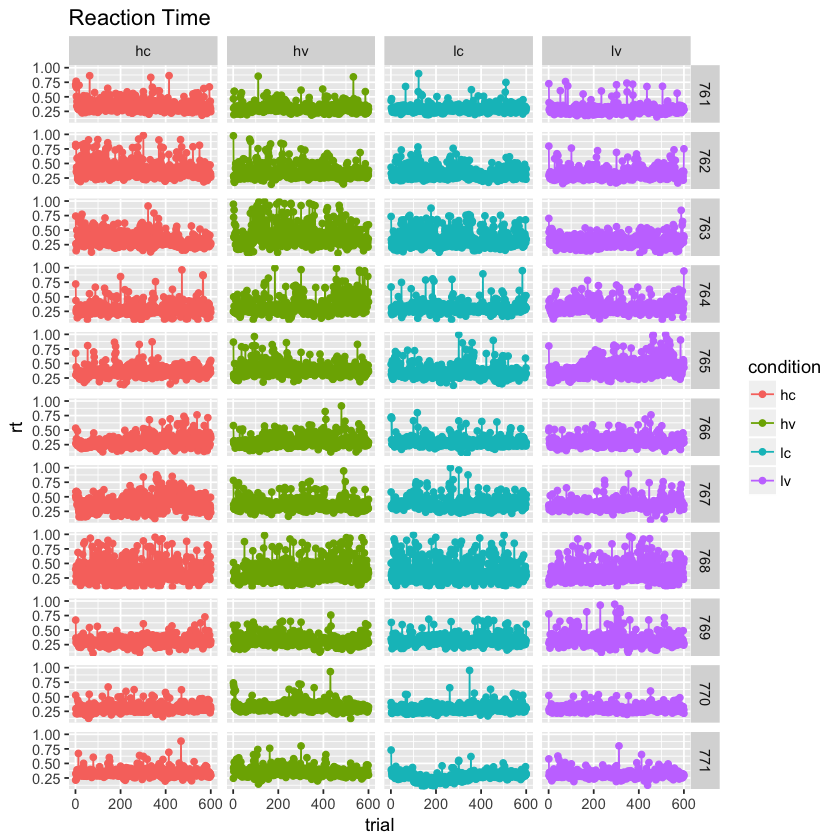

In [19]:
ggplot(clean_df, aes(trial, rt, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition) + ggtitle('Reaction Time')

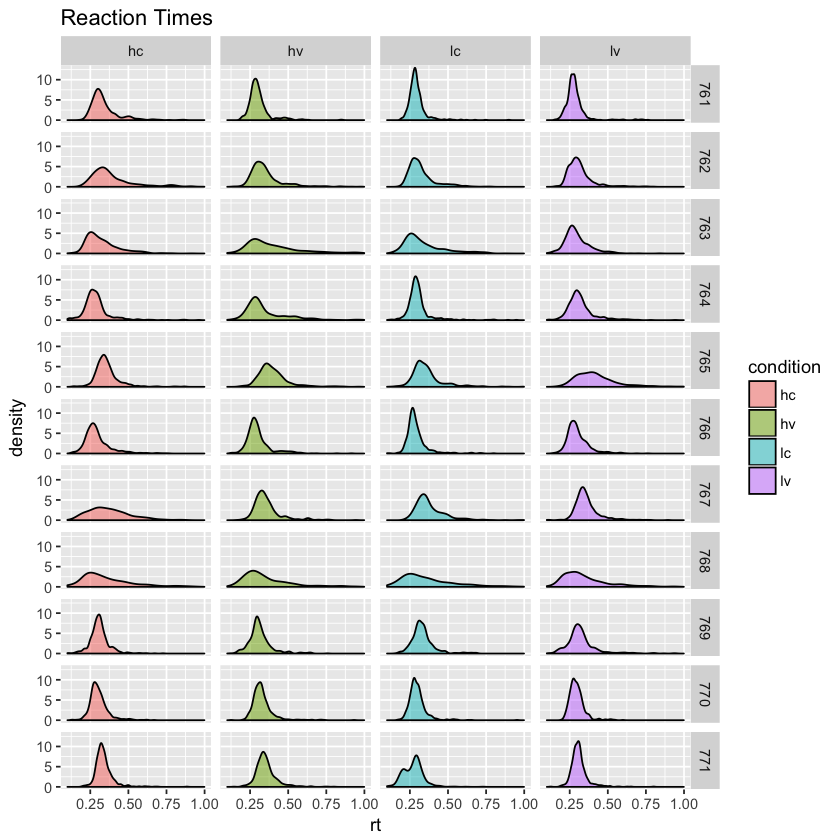

In [20]:
ggplot(clean_df, aes(rt, fill=condition)) +
geom_density(alpha=0.5) + facet_grid(ID ~ condition) + ggtitle('Reaction Times')

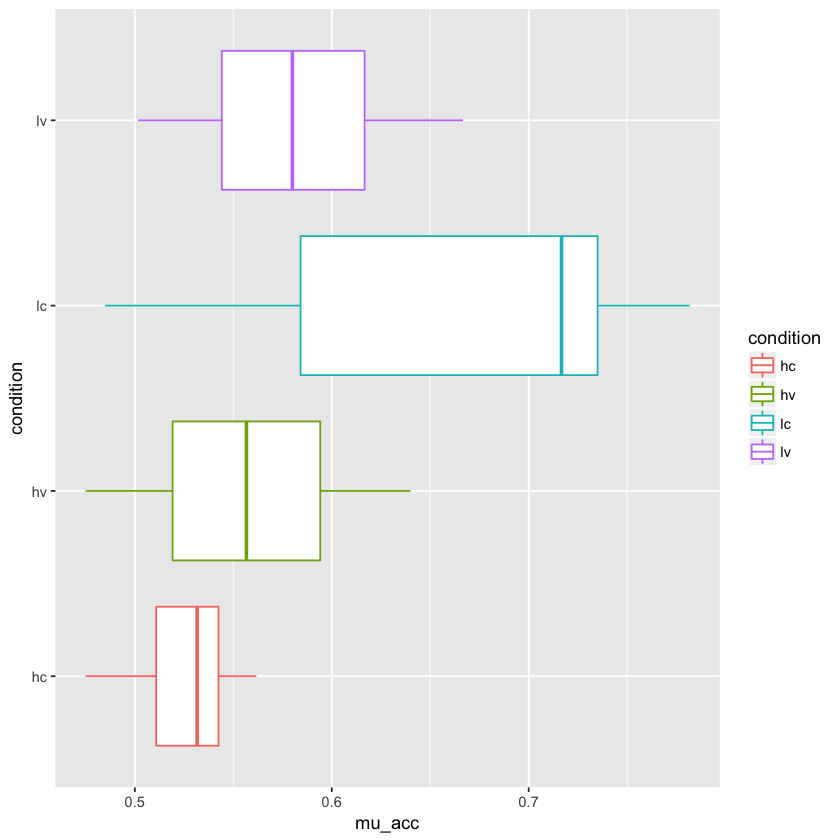

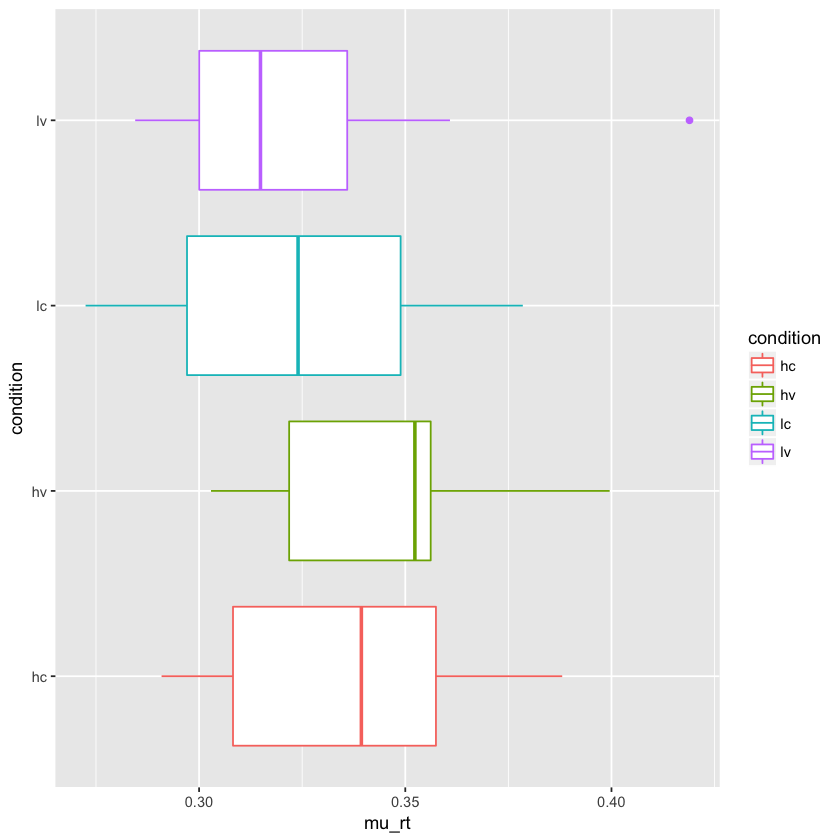

In [21]:
acc_stats <- clean_df %>% 
    group_by(ID, condition) %>% summarize(mu_acc=mean(accuracy))

rt_stats <- clean_df %>% 
    group_by(ID, condition) %>% summarize(mu_rt=mean(rt))

# ggplot(acc_stats, aes(mu_acc, ID)) +
#     geom_point(aes(fill=condition)) + coord_flip()

ggplot(acc_stats, aes(x=condition, y=mu_acc)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

ggplot(rt_stats, aes(x=condition, y=mu_rt)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

Picking joint bandwidth of 0.0106


Saving 7 x 7 in image
Picking joint bandwidth of 0.0106


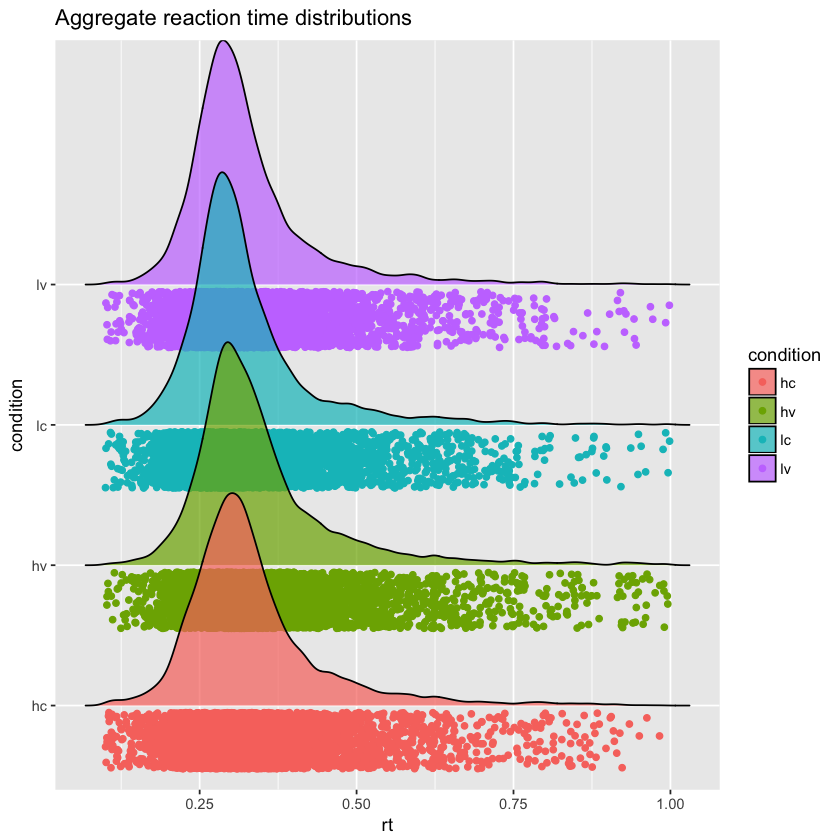

In [22]:
ggplot(clean_df, aes(rt,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + ggtitle('Aggregate reaction time distributions ')

ggsave('condition_rt_dist.pdf')

In [23]:
# ggplot(clean_df, aes(accuracy,condition, fill=condition)) +
#   geom_density_ridges(jittered_points = TRUE, position = "raincloud",
#                       alpha = 0.7, aes(point_color = condition, point_fill = condition)) + facet_grid(ID ~.) + ggtitle('Subject-level accuracy distributions ')

Picking joint bandwidth of 0.0761


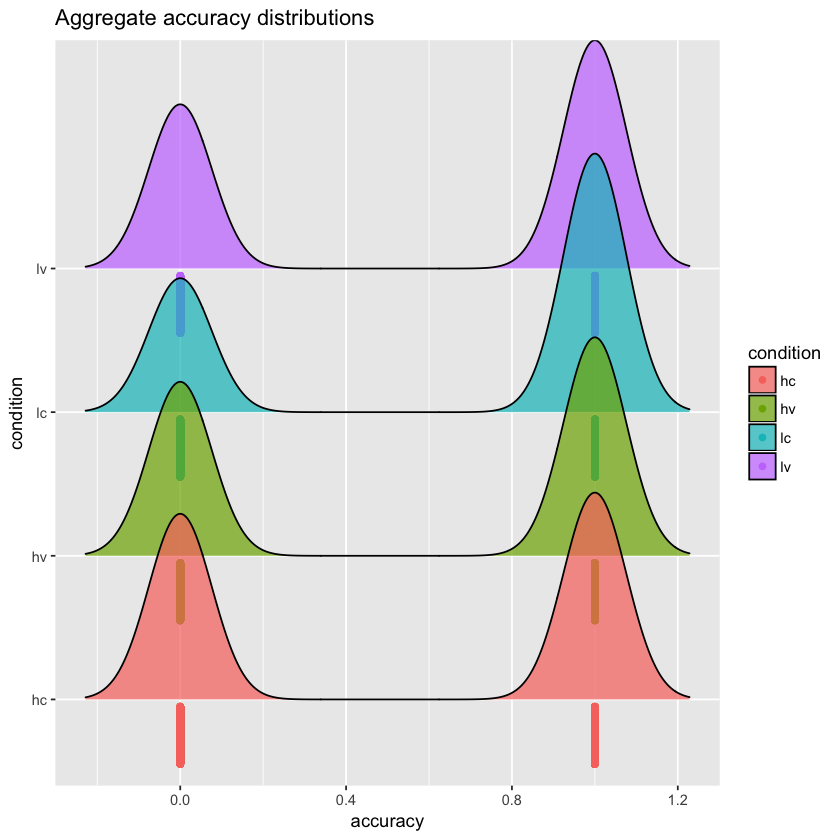

In [24]:
ggplot(clean_df, aes(accuracy,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) +  ggtitle('Aggregate accuracy distributions ')

In [25]:
#step 1: find the indices that correspond to the changepoint 
cp_idx <- which(clean_df$cp_with_slow_fast == 1)
#get trial before cp 
start_idx <- cp_idx - 1 
#add e. length  
end_idx <- cp_idx + 9

#construct intervals according to the start and end idx 
intervals <- mapply(seq, start_idx, end_idx)
conditions <- data.frame(condition=clean_df$condition[start_idx])
dim(conditions)

conditions_vec <- rep(conditions$condition, each=11)
rt_vec_slice <- clean_df$rt[intervals]
acc_vec_slice <- clean_df$accuracy[intervals]
# new_df = data.frame(t=conditions_vec)
# tail(new_df)

[1] 1131    1

In [136]:
clean_df[start_idx,'ID']

ID
770
770
770
770
770
770
770
770
770
770


In [26]:
#check intervals
start_idx[3]
end_idx[3]
intervals[,3]
#next, construct new df with these vals. 

#interval columns are cps
#rows are trials

[1] 83

[1] 93

[1] 83 84 85 86 87 88 89 90 91 92 93

In [28]:
lc <- sliced_df %>%
          filter(conditions =='lc')  

hc <- sliced_df %>%
          filter(conditions =='hc')  

lv <- sliced_df %>%
          filter(conditions =='lv')  
hv <- sliced_df %>%
          filter(conditions =='hv')  


lc_rt_vec = c(1:nrow(intervals))
hc_rt_vec = c(1:nrow(intervals))
hv_rt_vec = c(1:nrow(intervals))
lv_rt_vec = c(1:nrow(intervals))


lc_acc_vec = c(1:nrow(intervals))
hc_acc_vec = c(1:nrow(intervals))
hv_acc_vec = c(1:nrow(intervals))
lv_acc_vec = c(1:nrow(intervals))

for (idx in 1:nrow(intervals)){
lc_rt_vec[idx] <- mean(lc[lc$epoch_trial == idx, 'rt'], na.rm = TRUE)  
hc_rt_vec[idx] <- mean(hc[hc$epoch_trial == idx, 'rt'],na.rm = TRUE)   
hv_rt_vec[idx] <- mean(hv[hv$epoch_trial == idx, 'rt'],na.rm = TRUE)   
lv_rt_vec[idx] <- mean(lv[lv$epoch_trial == idx, 'rt'],na.rm = TRUE)  
    
lc_acc_vec[idx] <- mean(lc[lc$epoch_trial == idx, 'acc'],na.rm = TRUE)  
hc_acc_vec[idx] <- mean(hc[hc$epoch_trial == idx, 'acc'],na.rm = TRUE)   
hv_acc_vec[idx] <- mean(hv[hv$epoch_trial == idx, 'acc'],na.rm = TRUE)   
lv_acc_vec[idx] <- mean(lv[lv$epoch_trial == idx, 'acc'],na.rm = TRUE)  
}

acc_df <- data.frame(lc_acc_vec, hc_acc_vec,hv_acc_vec, lv_acc_vec)
rt_df <- data.frame(lc_rt_vec, hc_rt_vec,hv_rt_vec, lv_rt_vec)

In [30]:
gg_df_acc <- stack(acc_df)
gg_df_acc$ind <- sub("^(hc).*", "hc", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(lc).*", "lc", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(hv).*", "hv", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(lv).*", "lv", gg_df_acc$ind)
colnames(gg_df_acc) <- c('accuracy', 'condition')


In [31]:
gg_df_rt <- stack(rt_df)
gg_df_rt$ind <- sub("^(hc).*", "hc", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(lc).*", "lc", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(hv).*", "hv", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(lv).*", "lv", gg_df_rt$ind)
colnames(gg_df_rt) <- c('rt', 'condition')

In [32]:
gg_df <- cbind(gg_df_acc, gg_df_rt)
gg_df$trial <- rep(seq(1,11),4)
head(gg_df,12)

accuracy,condition,rt,condition,trial
0.7000000,lc,0.3281007,lc,1
0.3115385,lc,0.3367466,lc,2
0.3538462,lc,0.3178349,lc,3
0.5500000,lc,0.3239753,lc,4
0.6576923,lc,0.3251120,lc,5
0.6500000,lc,0.3190319,lc,6
0.6576923,lc,0.3180298,lc,7
0.6653846,lc,0.3268508,lc,8
0.7297297,lc,0.3186411,lc,9
0.7104247,lc,0.3303867,lc,10


In [33]:
conflict_rt_plt <- ggplot(subset(gg_df, condition=='hc'| condition=='lc'), aes(x=trial,y=rt, color=condition)) + geom_point() + geom_line()+ ylim(0.25,0.45) +  geom_vline(xintercept=2)
conflict_acc_plt <- ggplot(subset(gg_df, condition=='hc'| condition=='lc'), aes(x=trial,y=accuracy, color=condition)) + geom_point() + geom_line()+ ylim(0,1) +  geom_vline(xintercept=2) + geom_hline(yintercept = 0.65, color='red', alpha=0.5) + geom_hline(yintercept = 0.85, color='blue', alpha=0.5)

In [34]:
vol_rt_plt <- ggplot(subset(gg_df, condition=='hv'| condition=='lv'), aes(x=trial,y=rt, color=condition)) + geom_point() + geom_line()+ ylim(0.25,0.45) +  geom_vline(xintercept=2)
vol_acc_plt <- ggplot(subset(gg_df, condition=='hv'| condition=='lv'), aes(x=trial,y=accuracy, color=condition)) + geom_point() + geom_line()+ ylim(0,1) +  geom_vline(xintercept=2) + geom_hline(yintercept = 0.75, color='gray')

## Conflict time series 

In [35]:
library(boot)
?tsboot

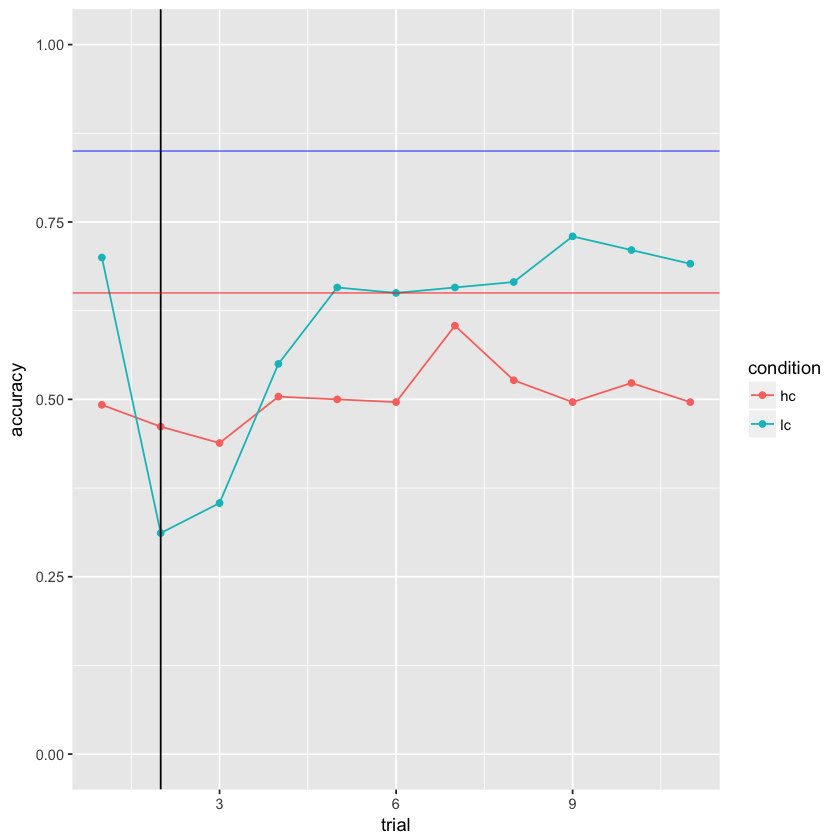

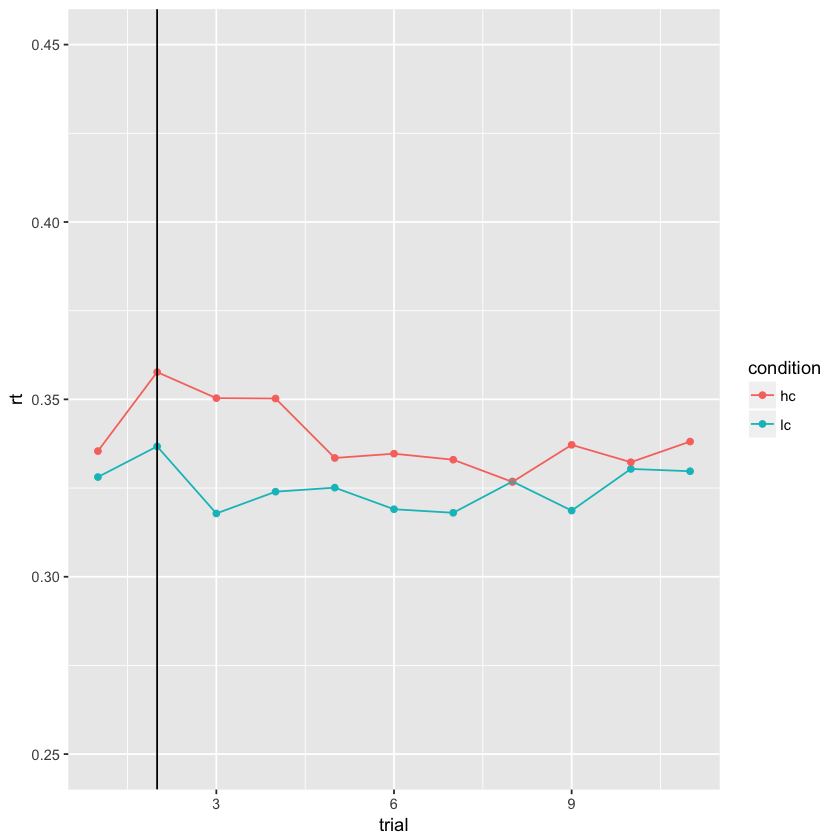

In [36]:
 conflict_acc_plt;conflict_rt_plt

## Volatility time series

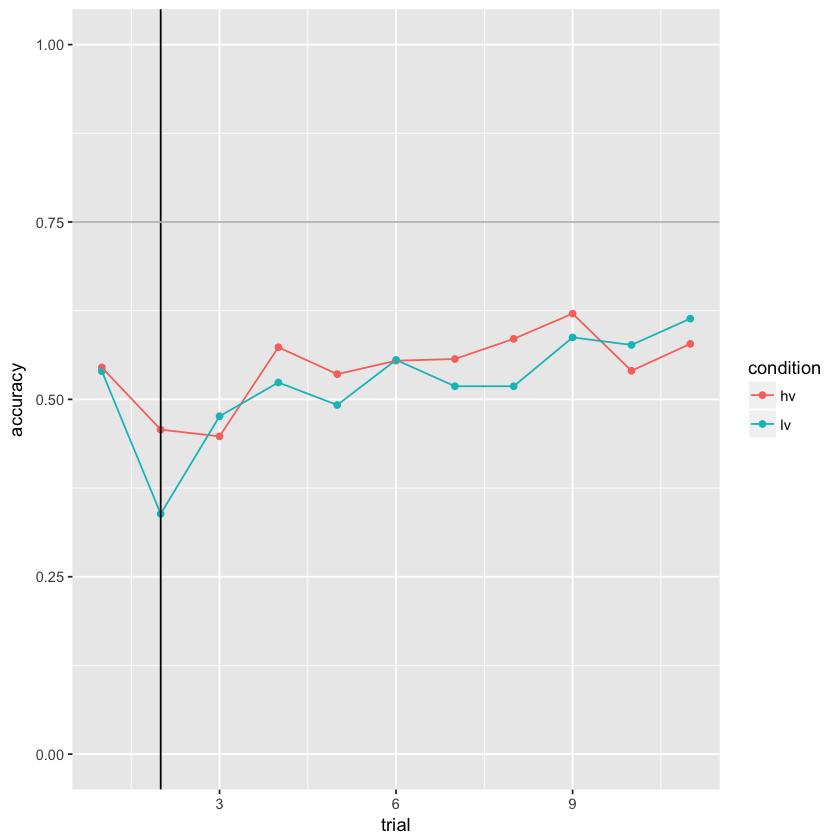

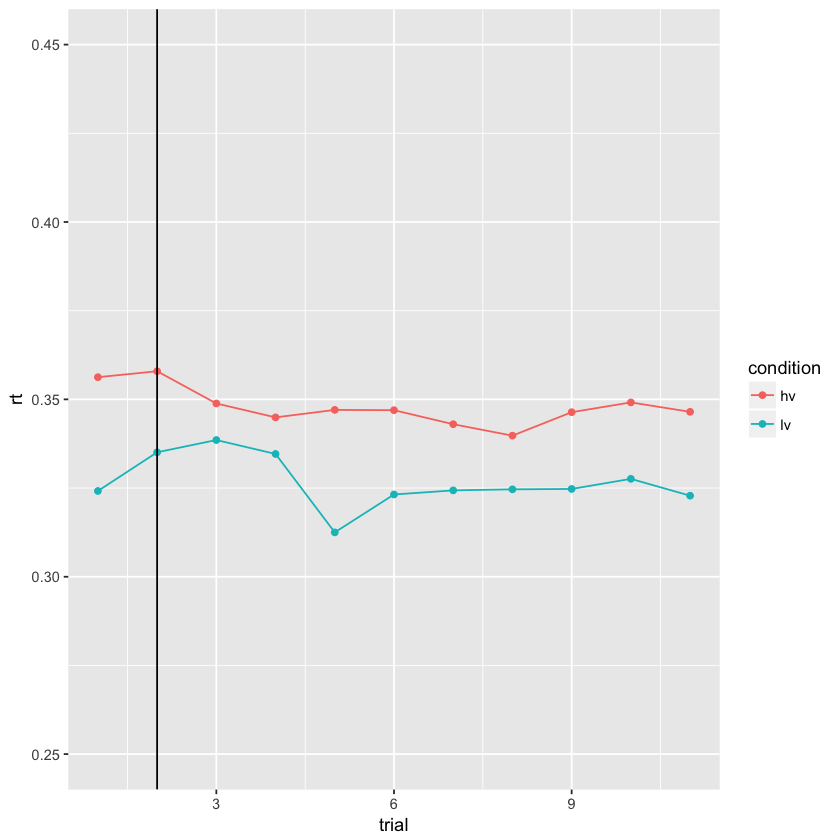

In [37]:
vol_acc_plt;vol_rt_plt

## Bootstrapped distributions of point estimates for behavior (mu accuracy, rt) 
### Note that this is currently over all trials. Need to bootstrap the average for each time point in the series that I'm plotting for nonparametric CIs.

In [38]:
setwd('/Users/Krista/Documents/R/functions')
source("bootstrap.R")

In [39]:
# would have been elegant but doesn't work as is
# condition_rt.boot <- sparse_df %>%  
#     group_by(condition)  %>% select(rt) %>% map(boot.mean)

In [ ]:
hc_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hc'), 'rt']))
lc_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lc'), 'rt']))

hv_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hv'), 'rt']))
lv_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lv'), 'rt']))

In [ ]:
hc_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hc'), 'accuracy']))
lc_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lc'), 'accuracy']))

hv_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hv'), 'accuracy']))
lv_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lv'), 'accuracy']))

In [ ]:
hc_rt.boot$interval; lc_rt.boot$interval
hc_acc.boot$interval; lc_acc.boot$interval

In [ ]:
hv_rt.boot$interval; lv_rt.boot$interval
hv_acc.boot$interval; lv_acc.boot$interval

In [ ]:
#want to overlay bootstrapped distributions for counter conditions 
conflict_rt.boot <- data.frame(stack(c(hc_rt_boot = hc_rt.boot$boot.statistics, lc_rt_boot=lc_rt.boot$boot.statistics)))
colnames(conflict_rt.boot) = c('bootstrapped_rt', 'condition')
conflict_rt.boot$condition <- sub("^(hc).*", "hc", conflict_rt.boot$condition)
conflict_rt.boot$condition <- sub("^(lc).*", "lc", conflict_rt.boot$condition)

In [ ]:
conflict_acc.boot <- data.frame(stack(c(hc_acc_boot = hc_acc.boot$boot.statistics, lc_acc_boot=lc_acc.boot$boot.statistics)))
colnames(conflict_acc.boot) = c('bootstrapped_acc', 'condition')
conflict_acc.boot$condition <- sub("^(hc).*", "hc", conflict_acc.boot$condition)
conflict_acc.boot$condition <- sub("^(lc).*", "lc", conflict_acc.boot$condition)

In [ ]:
#volatility bootstrapping 
vol_rt.boot <- data.frame(stack(c(hv_rt_boot = hv_rt.boot$boot.statistics, lv_rt_boot=lv_rt.boot$boot.statistics)))
colnames(vol_rt.boot) = c('bootstrapped_rt', 'condition')
vol_rt.boot$condition <- sub("^(hv).*", "hv", vol_rt.boot$condition)
vol_rt.boot$condition <- sub("^(lv).*", "lv", vol_rt.boot$condition)

In [ ]:
vol_acc.boot <- data.frame(stack(c(hv_acc_boot = hv_acc.boot$boot.statistics, lv_acc_boot=lv_acc.boot$boot.statistics)))
colnames(vol_acc.boot) = c('bootstrapped_acc', 'condition')
vol_acc.boot$condition <- sub("^(hv).*", "hv", vol_acc.boot$condition)
vol_acc.boot$condition <- sub("^(lv).*", "lv", vol_acc.boot$condition)

In [ ]:
binwidth = diff(range(conflict_rt.boot$bootstrapped_rt))/30
ggplot(conflict_rt.boot, aes(x=bootstrapped_rt)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='conflict rt')

In [ ]:
binwidth = diff(range(vol_rt.boot$bootstrapped_rt))/30
ggplot(vol_rt.boot, aes(x=bootstrapped_rt)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='volatility rt')

In [ ]:
binwidth = diff(range(vol_acc.boot$bootstrapped_acc))/30
ggplot(vol_acc.boot, aes(x=bootstrapped_acc)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='volatility accuracy')

In [ ]:
binwidth = diff(range(conflict_acc.boot$bootstrapped_acc))/30
ggplot(conflict_acc.boot, aes(x=bootstrapped_acc)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='conflict accuracy')

## bootstrapping example

In [ ]:
library(Lock5Data)
data(CommuteAtlanta)

In [ ]:
str(CommuteAtlanta)

In [ ]:
#find sample mean first
(time.mean = with(CommuteAtlanta, mean(Time)))

In [ ]:
#finding se 
#sample with replacement to form a matrix with one row for each bootstrap sample 
#and one column for each sampled value, matching original n
n_bootstrap_samples = 1000
n_sampled_vals = nrow(CommuteAtlanta)
boot.samples = matrix(sample(CommuteAtlanta$Time, size = n_bootstrap_samples * n_sampled_vals, replace = TRUE),
n_bootstrap_samples, n_sampled_vals)

In [ ]:
#now take average of each row of boot samples 
boot.statistics = apply(boot.samples, 1, mean)

In [ ]:
#visualize bootstrapped distribution of means
ggplot(data.frame(meanTime = boot.statistics),aes(x=meanTime)) +
geom_histogram(binwidth=0.25,aes(y=..density..)) +
geom_density(color="red")

In [ ]:
#find se of bootstrapped mean (std of dist. of means)
(time.se = sd(boot.statistics))

In [ ]:
#calc. bootstrapped confidence interval 
me = ceiling(10 * 2 * time.se)/10
round(time.mean, 1) + c(-1, 1) * me